
# Hipótese 3 - Análise de Crédito por Porte Empresarial - PEAC

**Projeto Aplicado - GRUPO 19**  
**Objetivo:** Analisar a Distribuição de crédito por porte empresarial.


In [1]:

# %%
# === IMPORTAÇÃO DE BIBLIOTECAS ===
import pandas as pd
import matplotlib.pyplot as plt
import os

# Estilo dos gráficos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

# Caminhos
PASTA_DATA = "../Data"
PASTA_RESULTADOS = "../Resultados"

os.makedirs(PASTA_RESULTADOS, exist_ok=True)


In [2]:

# %%
# === LEITURA DO DATASET ===
arquivo_csv = os.path.join(PASTA_DATA, "PEAC2022.csv")
dados = pd.read_csv(arquivo_csv, sep=";", decimal=",", encoding="latin1")

# Padronizar colunas
dados.columns = dados.columns.str.lower().str.strip()

print(f"Dataset carregado com sucesso!")
print(f"Shape: {dados.shape}")
print(f"Colunas: {list(dados.columns)}")

dados.head()


Dataset carregado com sucesso!
Shape: (453688, 12)
Colunas: ['nome_agente_financeiro', 'cnpj_cpf_cliente', 'nome_cliente', 'porte_cliente', 'valor_credito', 'valor_garantido', 'valor_desembolsado', 'data_solicitacao_outorga', 'municipio_investimento', 'uf_investimento', 'municipio_sede_cliente', 'uf_sede_cliente']


,nome_agente_financeiro,cnpj_cpf_cliente,nome_cliente,porte_cliente,valor_credito,valor_garantido,valor_desembolsado,data_solicitacao_outorga,municipio_investimento,uf_investimento,municipio_sede_cliente,uf_sede_cliente
0,ITAU,**.*43.060/0001-**,FERAMAR DISTRIBUIDORA T P L ME,Média,1.000.000,800.000,1.000.000,2022-09-15,NITEROI,RJ,NITEROI,RJ
1,ITAU,**.*86.809/0001-**,MASTER S.P.R. INS ELETRICAS,Média,200.000,160.000,200.000,2022-09-15,PEDREIRA,SP,PEDREIRA,SP
2,ITAU,**.*62.167/0001-**,I E C RODRIGUES - ME,Média,200.000,160.000,200.000,2022-09-21,CAMAQUA,RS,CAMAQUA,RS
3,ITAU,**.*49.182/0001-**,CLINUTRI LTDA EPP,Média,200.000,160.000,200.000,2022-09-19,RECIFE,PE,RECIFE,PE
4,ITAU,**.*47.450/0001-**,UTILIDADES GOURMET COM EIRELI,Média,1.500.000,1.200.000,1.500.000,2022-09-23,JUNDIAI,SP,JUNDIAI,SP


In [3]:

# %%
# === PADRONIZAÇÃO E LIMPEZA ===
dados.columns = dados.columns.str.lower().str.strip()

col_valor = [c for c in dados.columns if "valor" in c][0]
col_porte = [c for c in dados.columns if "porte" in c][0]

dados[col_valor] = (
    dados[col_valor].astype(str)
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False)
)
dados[col_valor] = pd.to_numeric(dados[col_valor], errors="coerce")

print(f"Coluna de valor: {col_valor}")
print(f"Coluna de porte: {col_porte}")


Coluna de valor: valor_credito
Coluna de porte: porte_cliente


In [4]:

# %%
# === AGRUPAMENTO POR PORTE ===
agrupado = dados.groupby(col_porte, as_index=False).agg(
    quantidade_operacoes=(col_valor, "count"),
    valor_total=(col_valor, "sum")
)
agrupado["ticket_medio"] = agrupado["valor_total"] / agrupado["quantidade_operacoes"]
agrupado["%_valor"] = (agrupado["valor_total"] / agrupado["valor_total"].sum()) * 100
agrupado["%_quantidade"] = (agrupado["quantidade_operacoes"] / agrupado["quantidade_operacoes"].sum()) * 100

agrupado = agrupado.sort_values("valor_total", ascending=False)
agrupado.head()


,porte_cliente,quantidade_operacoes,valor_total,ticket_medio,%_valor,%_quantidade
1,Média,156603,1.445822e+11,923240.599115,76.309636,34.517774
2,Pequena,211560,3.970857e+10,187694.129501,20.957943,46.631165
0,Micro,85525,5.177060e+09,60532.712440,2.732421,18.851061


### 1) Distribuição do Crédito por Porte Empresarial

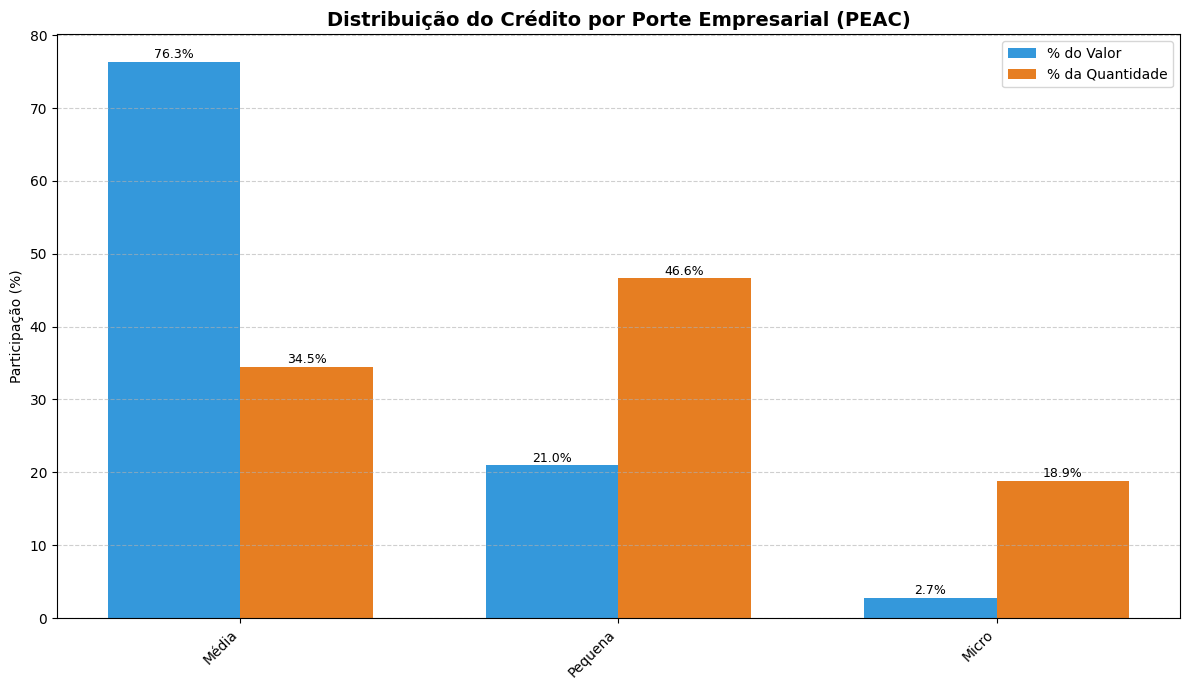

In [5]:

# %%
x = range(len(agrupado))
largura = 0.35

plt.figure(figsize=(12,7))
plt.bar(x, agrupado["%_valor"], width=largura, color="#3498db", label="% do Valor")
plt.bar([i + largura for i in x], agrupado["%_quantidade"], width=largura, color="#e67e22", label="% da Quantidade")

plt.xticks([i + largura/2 for i in x], agrupado[col_porte], rotation=45, ha="right")
plt.ylabel("Participação (%)")
plt.title("Distribuição do Crédito por Porte Empresarial (PEAC)", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

for i, v in enumerate(agrupado["%_valor"]):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha="center", fontsize=9)
for i, v in enumerate(agrupado["%_quantidade"]):
    plt.text(i + largura, v + 0.5, f"{v:.1f}%", ha="center", fontsize=9)

caminho_grafico1 = os.path.join(PASTA_RESULTADOS, "grafico_distribuicao_porte.png")
plt.tight_layout()
plt.savefig(caminho_grafico1, dpi=300, bbox_inches="tight")
plt.show()


### 2) Ticket Médio por Porte Empresarial

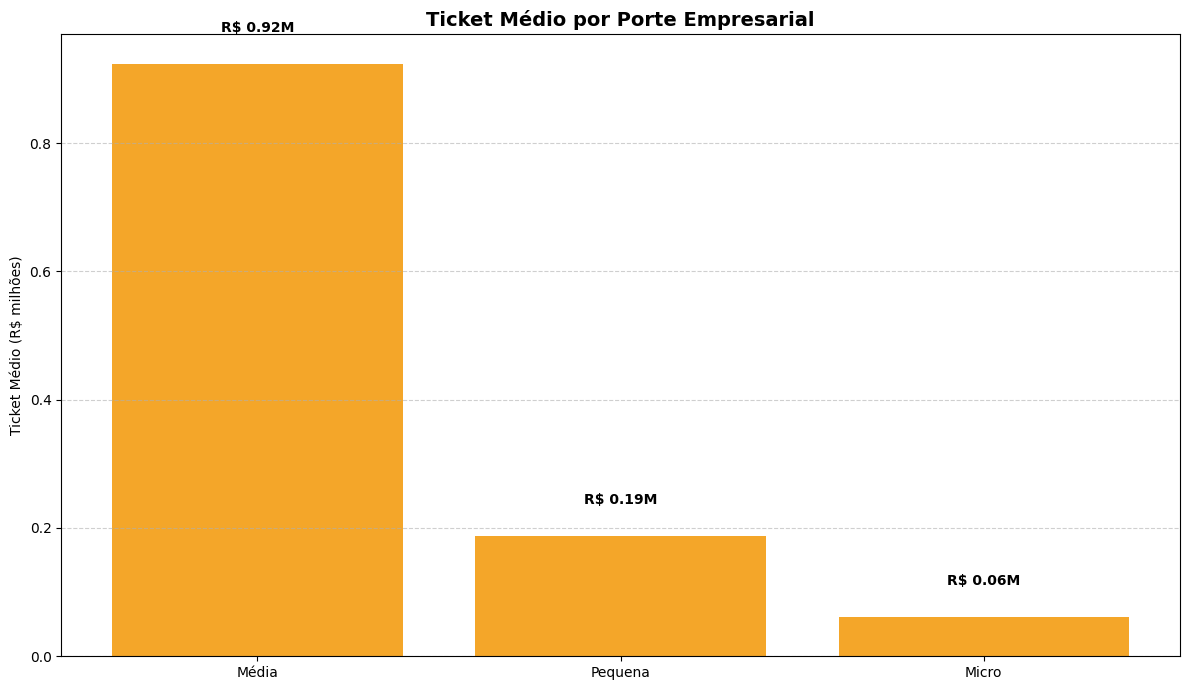

In [6]:

# %%
plt.figure(figsize=(12,7))
bars = plt.bar(agrupado[col_porte], agrupado["ticket_medio"]/1e6, color="#f39c12", alpha=0.9)
plt.ylabel("Ticket Médio (R$ milhões)")
plt.title("Ticket Médio por Porte Empresarial", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f"R$ {height:.2f}M", ha="center", fontsize=10, fontweight="bold")

caminho_grafico2 = os.path.join(PASTA_RESULTADOS, "grafico_ticket_medio_porte.png")
plt.tight_layout()
plt.savefig(caminho_grafico2, dpi=300, bbox_inches="tight")
plt.show()


### 3) Tabela Resumo da Distribuição de Crédito

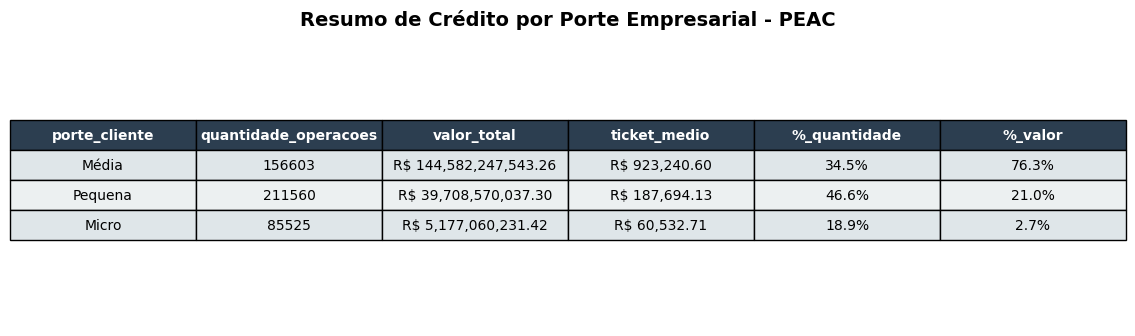

In [7]:

# %%
tabela = agrupado[[col_porte, "quantidade_operacoes", "valor_total", "ticket_medio", "%_quantidade", "%_valor"]].round(2)
tabela_display = tabela.copy()
tabela_display["valor_total"] = tabela_display["valor_total"].apply(lambda x: f"R$ {x:,.2f}")
tabela_display["ticket_medio"] = tabela_display["ticket_medio"].apply(lambda x: f"R$ {x:,.2f}")
tabela_display["%_quantidade"] = tabela_display["%_quantidade"].apply(lambda x: f"{x:.1f}%")
tabela_display["%_valor"] = tabela_display["%_valor"].apply(lambda x: f"{x:.1f}%")

fig, ax = plt.subplots(figsize=(12, len(tabela_display)*0.6 + 2))
ax.axis("off")
table = ax.table(cellText=tabela_display.values, colLabels=tabela_display.columns, loc="center", cellLoc="center")
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.8)

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_text_props(weight="bold", color="white")
        cell.set_facecolor("#2c3e50")
    else:
        cell.set_facecolor("#ecf0f1" if i % 2 == 0 else "#dfe6e9")

caminho_tabela = os.path.join(PASTA_RESULTADOS, "tabela_resumo_porte.png")
plt.title("Resumo de Crédito por Porte Empresarial - PEAC", fontsize=14, fontweight="bold")
plt.savefig(caminho_tabela, dpi=300, bbox_inches="tight")
plt.show()
